2 つの CSV ファイルを読み込み、各ルールにおける precision（適合率）と recall（再現率）を計算


In [29]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# CSVファイルの読み込み
gemini_df = pd.read_csv('../../data/test/sampling_check_by_gemini_2.csv')
human_df = pd.read_csv('../../data/test/sampling_check_by_human.csv')

In [32]:
# 評価結果を格納する辞書
metrics = {}

# 対象となるルールを抽出（rule1 ~ rule33）
rules = [f'rule{i}' for i in range(1, 34)]

# 各ルールについて計算
for rule in rules:
    # True Positives (TP): Geminiと人間判定が両方 "yes"
    tp = ((gemini_df[rule] == 'yes') & (human_df[rule] == 'yes')).sum()
    
    # False Positives (FP): Geminiが "yes" だが、人間判定が "no"
    fp = ((gemini_df[rule] == 'yes') & (human_df[rule] == 'no')).sum()
    
    # False Negatives (FN): Geminiが "no" だが、人間判定が "yes"
    fn = ((gemini_df[rule] == 'no') & (human_df[rule] == 'yes')).sum()
    
    # True Negatives (TN): Geminiと人間判定が両方 "no"
    tn = ((gemini_df[rule] == 'no') & (human_df[rule] == 'no')).sum()
    
    # Precision（適合率）
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Recall（再現率）
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # F1スコア
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Accuracy（正確度）
    accuracy = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0 else 0
    
    # 辞書に結果を保存
    metrics[rule] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy
    }

# 結果をDataFrameに変換して表示
metrics_df = pd.DataFrame(metrics).T
metrics_df.index.name = 'Rule'
metrics_df.reset_index(inplace=True)

# Accuracyの平均を計算
accuracy_mean = metrics_df['Accuracy'].mean()
print(f"\n全ルールのAccuracyの平均: {accuracy_mean:.4f}")

# 表示
print(metrics_df)



全ルールのAccuracyの平均: 0.6392
      Rule  Precision    Recall  F1 Score  Accuracy
0    rule1   0.882353  0.714286  0.789474  0.760000
1    rule2   0.000000  0.000000  0.000000  0.680000
2    rule3   0.461538  0.300000  0.363636  0.790000
3    rule4   0.710526  0.627907  0.666667  0.730000
4    rule5   1.000000  0.361702  0.531250  0.400000
5    rule6   0.916667  0.211538  0.343750  0.580000
6    rule7   0.725490  0.560606  0.632479  0.570000
7    rule8   0.880000  0.594595  0.709677  0.640000
8    rule9   0.340000  0.772727  0.472222  0.620000
9   rule10   0.666667  0.166667  0.266667  0.670000
10  rule11   0.875000  1.000000  0.933333  0.880000
11  rule12   0.329545  1.000000  0.495726  0.410000
12  rule13   0.833333  0.454545  0.588235  0.860000
13  rule14   0.928571  0.481481  0.634146  0.850000
14  rule15   0.333333  0.250000  0.285714  0.850000
15  rule16   0.897436  0.660377  0.760870  0.780000
16  rule17   0.729167  1.000000  0.843373  0.740000
17  rule18   0.634409  1.000000  0.776

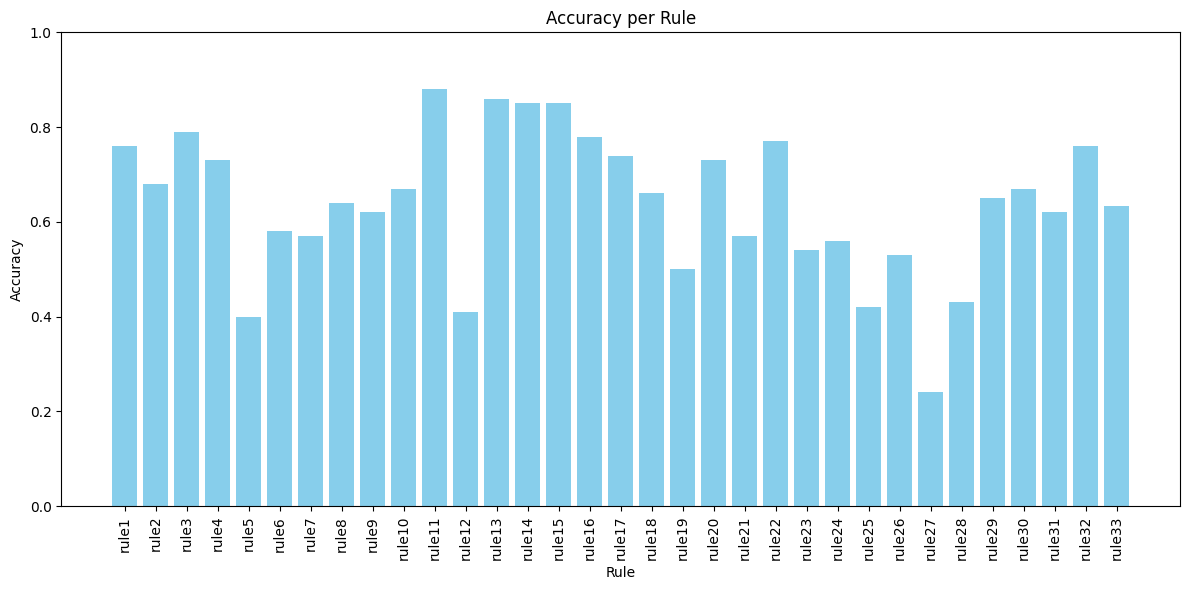

In [33]:
# Accuracyの棒グラフを作成
plt.figure(figsize=(12, 6))
plt.bar(metrics_df['Rule'], metrics_df['Accuracy'], color='skyblue')
plt.xlabel('Rule')
plt.ylabel('Accuracy')
plt.title('Accuracy per Rule')
plt.xticks(rotation=90)
plt.ylim(0, 1)  # Accuracyの範囲は0〜1
plt.tight_layout()
plt.show()


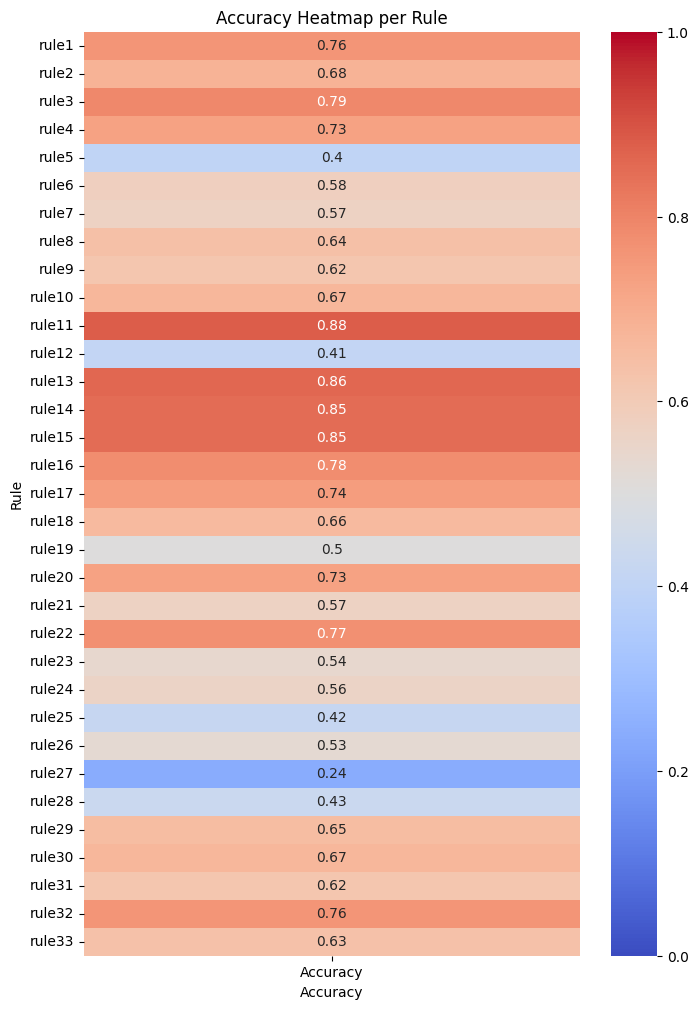

In [34]:
import seaborn as sns

# データフレームを加工してヒートマップ用の形式に変換
accuracy_df = metrics_df[['Rule', 'Accuracy']].set_index('Rule')

# ヒートマップの描画
plt.figure(figsize=(8, 12))
sns.heatmap(accuracy_df, annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1)
plt.title('Accuracy Heatmap per Rule')
plt.xlabel('Accuracy')
plt.ylabel('Rule')
plt.show()


/Volumes/Macintosh HD - Data 1/Users/quandomac1/Project/PTL1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Volumes/Macintosh HD - Data 1/Users/quandomac1/Project/PTL1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Volumes/Macintosh HD - Data 1/Users/quandomac1/Project/PTL1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


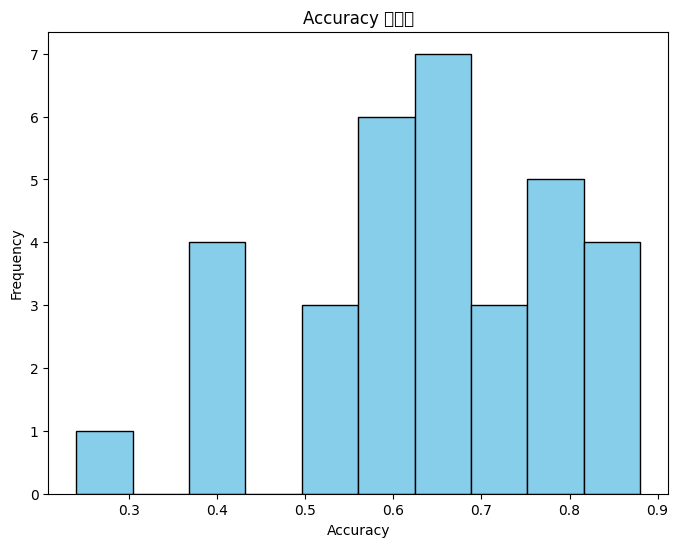

In [35]:
# Accuracyのヒストグラムを作成
plt.figure(figsize=(8, 6))
plt.hist(metrics_df['Accuracy'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy の分布')
plt.show()
